In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
# f_classif is used when the target is a classification variable

Documentation based on:
https://scikit-learn.org/stable/modules/feature_selection.html

In [2]:
data = datasets.load_wine() #Loading the wine dataset in numpy-format

data = pd.DataFrame(data=np.c_[data['data'], data['target']],  # concate arrays (using np.c_)
                    columns=data['feature_names']+['target'])
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [3]:
# Create features and target variables.
y = data[['target']]
X = data.drop(y, axis=1)

<h2> SelectKBest </h2>
This selector choices the k columns which obtain individually best statistical score on a defined metric.<br>
In this way, the correlation in between features are not taken into account, only the relation in between<br>
each feature and the target.<br>
Here, the different statistical scores to be considered in ranking process:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [4]:
def calc_score_SelectKBest(k, test_size=0.2):
    """
    :param k: number of columns, with higher metric score, to be selected
    :param test_size: percentage of the sample to be tested
    :return: dataframe with best k columns, and scores
    """

    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit_transform(X, y.values.ravel())
    cols_idxs = selector.get_support(indices=True)
    X_kBest = X.iloc[:,cols_idxs]  # Dataframe shorter with kBest columns (higher metric score)

    # split the training and test sample
    X_train, X_test, y_train, y_test = train_test_split(X_kBest, y, test_size=test_size, random_state=42)

    # choice an estimator and train the model
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train.values.ravel())

    model_score = model.score(X_train, y_train)
    accuracy = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))

    feature_names=list(X.columns)
    sel_scores = list(selector.scores_)
    sel_pvalues= list(selector.pvalues_)

    metric_score = {name:(score, p) for name, score, p in zip(feature_names, sel_scores, sel_pvalues)}

    return X_kBest, model_score, accuracy, metric_score

In [5]:
X_kBest, model_score, accuracy, metric_score = calc_score_SelectKBest(k=4, test_size=0.2)
metric_score
#model_score, accuracy

{'alcohol': (135.07762424283948, 3.319503795566952e-36),
 'malic_acid': (36.94342496318376, 4.127228798041549e-14),
 'ash': (13.312901199989989, 4.149967974797001e-06),
 'alcalinity_of_ash': (35.77163740730817, 9.444472938834056e-14),
 'magnesium': (12.429584338150178, 8.963395439248853e-06),
 'total_phenols': (93.73300962036775, 2.137670015437993e-28),
 'flavanoids': (233.92587268154838, 3.598585830714539e-50),
 'nonflavanoid_phenols': (27.575417146965727, 3.888040900479377e-11),
 'proanthocyanins': (30.27138317022791, 5.125358737545633e-12),
 'color_intensity': (120.66401844100372, 1.1620080219273226e-33),
 'hue': (101.31679539029965, 5.917662216362997e-30),
 'od280/od315_of_diluted_wines': (189.97232057888206, 1.393104956945986e-44),
 'proline': (207.92037390217828, 5.78316835610455e-47)}

In [6]:
# Dataframe with the best ranked k features
X_kBest

,alcohol,flavanoids,od280/od315_of_diluted_wines,proline
0,14.23,3.06,3.92,1065.0
1,13.20,2.76,3.40,1050.0
2,13.16,3.24,3.17,1185.0
3,14.37,3.49,3.45,1480.0
4,13.24,2.69,2.93,735.0
...,...,...,...,...
173,13.71,0.61,1.74,740.0
174,13.40,0.75,1.56,750.0
175,13.27,0.69,1.56,835.0
176,13.17,0.68,1.62,840.0


<h2> VarianceThreshold </h2>

This selector removes all features whose variance does not reach a threshold.<br>
The variance is defined as: $Var[X] := p(1-p)$ <br>
Where $p \in [0, 1]$, is the probability of obtaining an frequent value in X.<br>
In this way, this selector is useful when the feature $X$ have values which are very frequent (let's say $\sim 80\%$)

In [7]:
from sklearn.feature_selection import VarianceThreshold
import random

# Create a Dataframe with n=3 features (and without target column) and randomize the order in each feature
feature_1 = 75*[1] + 25*[0] ; random.shuffle(feature_1)          # 1 (75%) and 0 (25%)
feature_2 = 90*[1] + 10*[0] ; random.shuffle(feature_2)          # 1 (90%) and 0 (10%)
feature_3 = 85*[True] + 15*[False] ; random.shuffle(feature_3)   # True (85%) and False (15%)

df_VT = pd.DataFrame({'feature_1':feature_1,
                      'feature_2':feature_2,
                      'feature_3':feature_3})
df_VT

,feature_1,feature_2,feature_3
0,1,1,True
1,1,1,True
2,1,1,True
3,1,1,True
4,1,1,True
...,...,...,...
95,1,1,True
96,0,1,True
97,1,1,False
98,1,1,True


In [8]:
def Removing_lowVariance(df, p=0.8):
    """
    This function removes the features which do not reach the threshold for variance
    @:param
    p: probability (threshold)
    :return: df_shorted
    """
    variance = (p*(1.0-p))

    selector = VarianceThreshold(threshold=variance)
    selector.fit_transform(df)
    cols_idxs = selector.get_support(indices=True)
    df_shorted = df.iloc[:,cols_idxs]  # Dataframe shorter which pass the threshold
    return df_shorted

In [9]:
# if we choose p = 0.87, we expect that only feature_2 column be removed
df_shorted = Removing_lowVariance(df=df_VT, p=0.87)
df_shorted

,feature_1,feature_3
0,1,True
1,1,True
2,1,True
3,1,True
4,1,True
...,...,...
95,1,True
96,0,True
97,1,False
98,1,True


This algoritm is useful when there are many columns in the dataset and we do not know visually <br> if are presented many repeated values in each feature.

<h2> Feature importances with a forest of trees </h2>
Here, will be used the permutation on full model. Although this model is more costly than <br> "Feature importance based on mean decrease in impurity", does not have a bias toward high-cardinality values.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [11]:
# Create Features and Target samples
X_, y_ = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)
feature_names = [f"feature {i}" for i in range(X_.shape[1])]

In [12]:
# Using Random Forest for permutations
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

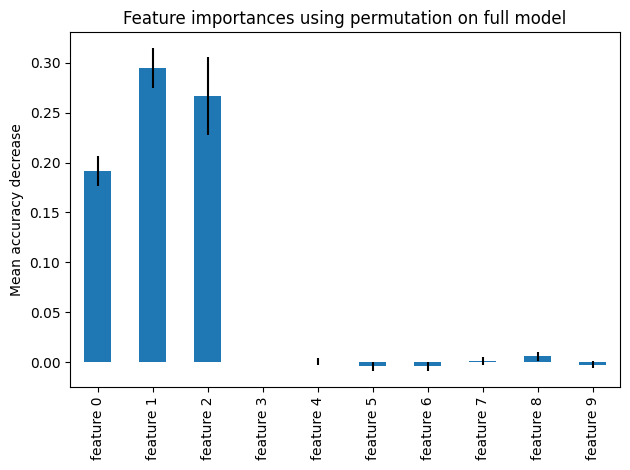

In [14]:
# Plot of importances
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [18]:
forest_importances

feature 0    0.1920
feature 1    0.2945
feature 2    0.2665
feature 3    0.0000
feature 4    0.0005
feature 5   -0.0040
feature 6   -0.0040
feature 7    0.0010
feature 8    0.0060
feature 9   -0.0025
dtype: float64